# Machine Learning - Beginner track
**Hi! PARIS DataBootcamp 2025** <br>
**Author**: Laurène DAVID, Machine Learning Research Engineer @ Hi! PARIS <br>
**Teaching Assistants**: Thibault Porssut and Farouk Kadri, Machine Learning Research Engineer @ Hi! PARIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data cleaning and preparation

In [2]:
# Example: read file
data = pd.read_csv("Titanic-Dataset.csv")


In [3]:
# View the 5 first observations of the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Get general info on the dataset (number of missing values, data types, columns, ...)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Drop irrelevant columns (or too difficult to process)
data.drop(columns=["Cabin","PassengerId","Ticket","Name"], inplace=True)

In [6]:
# Check the number of missing values per column
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
## -------- FILL MISSING VALUES WITH THE AVERAGE AGE OF PASSENGERS -----------

avg_age = data["Age"].mean().round()
data["Age"] = data["Age"].fillna(avg_age)

In [8]:
# Delete rows/observations with missing values for Embarked
data.dropna(subset=["Embarked"], inplace=True)

In [9]:
# View the data types of each feature
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

## 2. Exploratory Data Analysis

In [10]:
data[["Age", "Fare"]].describe()

,Age,Fare
count,889.000000,889.000000
mean,29.713352,32.096681
std,12.969135,49.697504
min,0.420000,0.000000
25%,22.000000,7.895800
50%,30.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


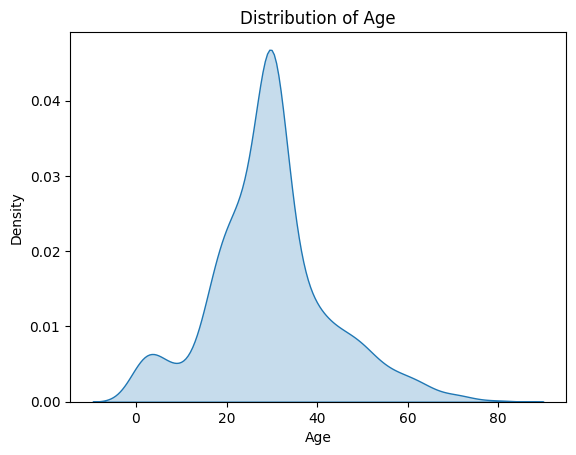

In [11]:
sns.kdeplot(data=data, x="Age", fill="Age")
plt.title("Distribution of Age");

In [12]:
df_survived_freq = data["Survived"].value_counts().to_frame().reset_index()
df_survived_freq.columns = ["survived", "count"]
df_survived_freq

,survived,count
0,0,549
1,1,340


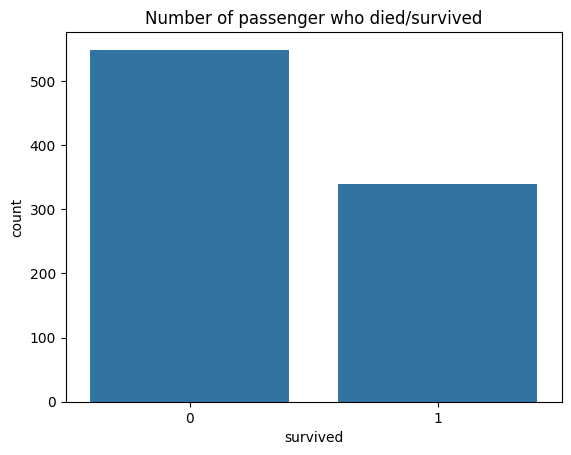

In [13]:
sns.barplot(data=df_survived_freq, x="survived", y="count")
plt.title("Number of passenger who died/survived")
plt.show()

In [14]:
corr_continuous_var = data.select_dtypes(include=[int, float]).corr()
corr_continuous_var

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.075512,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.326343,0.081656,0.016824,-0.548193
Age,-0.075512,-0.326343,1.000000,-0.231691,-0.179377,0.087674
SibSp,-0.034040,0.081656,-0.231691,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.179377,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.087674,0.160887,0.217532,1.000000


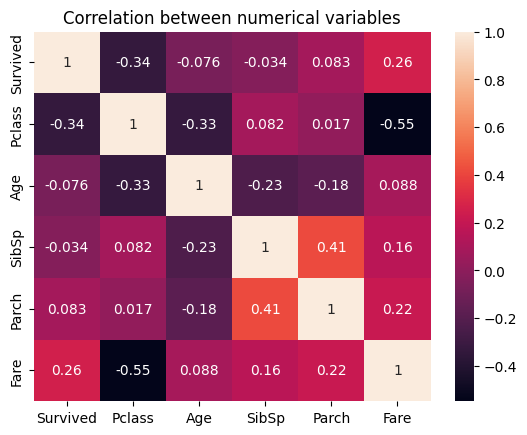

In [15]:
sns.heatmap(corr_continuous_var, annot=True)
plt.title("Correlation between numerical variables");

In [16]:
df_plot_survived_pclass = data.groupby("Pclass")["Survived"].sum().to_frame().reset_index()
df_plot_survived_pclass["Survived"] = np.round(df_plot_survived_pclass["Survived"]/df_plot_survived_pclass.shape[0])
df_plot_survived_pclass

,Pclass,Survived
0,1,45.0
1,2,29.0
2,3,40.0


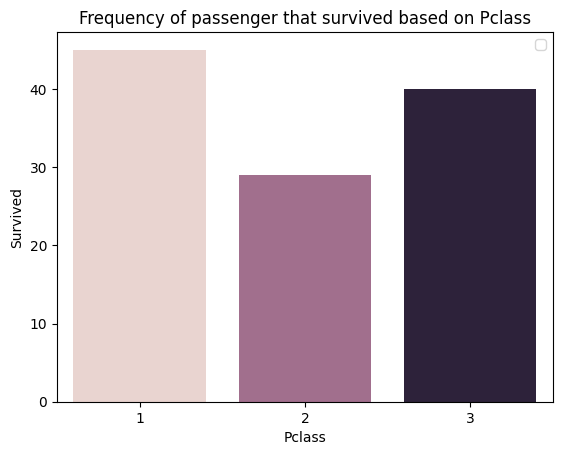

In [17]:
sns.barplot(data=df_plot_survived_pclass, x="Pclass", y="Survived", hue="Pclass")

plt.title("Frequency of passenger that survived based on Pclass");
plt.legend("")
plt.show()

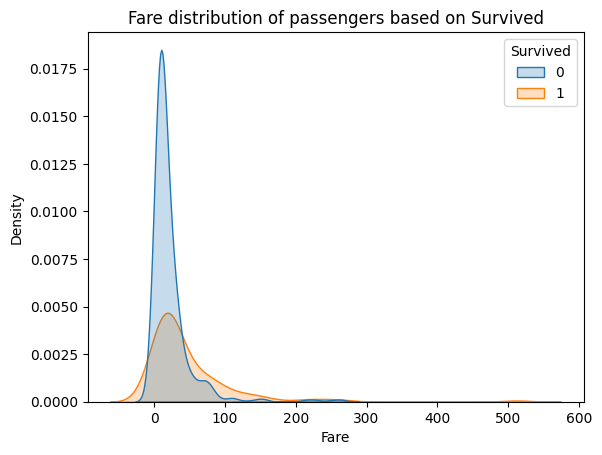

In [18]:
sns.kdeplot(data=data, x="Fare", hue="Survived", fill=True);
plt.title("Fare distribution of passengers based on Survived");

## 3. Data preprocessing

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [20]:
# Seperate features and target features
X = data.drop(columns=["Survived"])
y = data["Survived"]

In [21]:
# Create train/test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [22]:
# Define predicted class
classes = np.unique(y)
classes

array([0, 1], dtype=int64)

In [23]:
# Identify continuous and categorical data for separate transformations
categorical_var = list(X_train.select_dtypes(include="object").columns)
continuous_var = list(X_train.select_dtypes(include=[int, float]).columns)

### 3.1 OneHotEncoder on categorical data

In [24]:
# Check the number of unique values for each categorical features
for col in categorical_var:
    print(col, X_train[col].nunique())

Sex 2
Embarked 3


In [25]:
# Apply OneHotEncoder seperatly on X_train and X_test
onehot_encoder = OneHotEncoder(sparse_output=False)

X_train_cat = onehot_encoder.fit_transform(X_train[categorical_var])
X_test_cat = onehot_encoder.transform(X_test[categorical_var])

X_train_cat

array([[0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.]])

In [26]:
# Get feature names created by OneHotEncoder
onehot_features = onehot_encoder.get_feature_names_out()

# Build new dataframe with onehotencoded variables
X_train_cat = pd.DataFrame(X_train_cat, columns=onehot_features)
X_test_cat = pd.DataFrame(X_test_cat, columns=onehot_features)

X_train_cat

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
706,1.0,0.0,0.0,0.0,1.0
707,0.0,1.0,0.0,0.0,1.0
708,1.0,0.0,0.0,0.0,1.0
709,0.0,1.0,0.0,0.0,1.0


### 3.2 StandardScaler on continuous data

In [27]:
# Apply standard scaler on X_train and X_test seperatly
std_scaler = StandardScaler()

X_train_cont = std_scaler.fit_transform(X_train[continuous_var])
X_test_cont = std_scaler.transform(X_test[continuous_var])

X_train_cont

array([[ 0.83863027,  0.03512475, -0.46960647, -0.46541948, -0.5099813 ],
       [-0.36351917,  0.03512475, -0.46960647, -0.46541948, -0.40161722],
       [ 0.83863027,  0.03512475, -0.46960647, -0.46541948, -0.3696925 ],
       ...,
       [-1.5656686 ,  0.03512475,  0.42554152, -0.46541948,  2.23962049],
       [ 0.83863027,  0.07402459, -0.46960647, -0.46541948, -0.5099813 ],
       [ 0.83863027,  0.11292443, -0.46960647, -0.46541948, -0.51271777]])

In [28]:
# Build dataframes from the scaled variables
X_train_cont = pd.DataFrame(X_train_cont, columns=continuous_var)
X_test_cont = pd.DataFrame(X_test_cont, columns=continuous_var)

X_train_cont

,Pclass,Age,SibSp,Parch,Fare
0,0.838630,0.035125,-0.469606,-0.465419,-0.509981
1,-0.363519,0.035125,-0.469606,-0.465419,-0.401617
2,0.838630,0.035125,-0.469606,-0.465419,-0.369693
3,-1.565669,-0.587273,0.425542,-0.465419,0.771780
4,0.838630,0.035125,-0.469606,-0.465419,-0.516549
...,...,...,...,...,...
706,-0.363519,0.890921,-0.469606,0.807324,-0.259321
707,-0.363519,0.346323,-0.469606,-0.465419,-0.401617
708,-1.565669,0.035125,0.425542,-0.465419,2.239620
709,0.838630,0.074025,-0.469606,-0.465419,-0.509981


In [29]:
## MERGE CATEGORICAL AND CONTINUOUS VARIABLES
X_train = pd.concat([X_train_cont, X_train_cat], axis=1)
X_test = pd.concat([X_test_cont, X_test_cat], axis=1)

## 4. Model training and evaluation

In [30]:
## Import machine learning models from scikit-learn
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier

In [31]:
## Import evaluation metrics from scikit-learn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import PrecisionRecallDisplay

### 4.1 Training a Decision Tree (classifier)

In [32]:
## Train a decision tree Classifier
tree = DecisionTreeClassifier() # define the model
tree.fit(X_train, y_train) # fit means train

## Make predictions with X_test
tree_pred = tree.predict(X_test)
tree_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

### 4.2 Evaluate a Decision Tree

In [33]:
## Compute model accuracy and F1-score
tree_accuracy = accuracy_score(y_pred=tree_pred, y_true=y_test)
tree_f1score = f1_score(y_pred=tree_pred, y_true=y_test)

## Display results
print("Accuracy:", tree_accuracy)
print("F1-score:", tree_f1score)

Accuracy: 0.7134831460674157
F1-score: 0.6577181208053692


In [34]:
# Compute confusion matrix
confusion_mat = confusion_matrix(y_true=y_test, y_pred=tree_pred, labels=classes, normalize="true")
confusion_mat

array([[0.70909091, 0.29090909],
       [0.27941176, 0.72058824]])

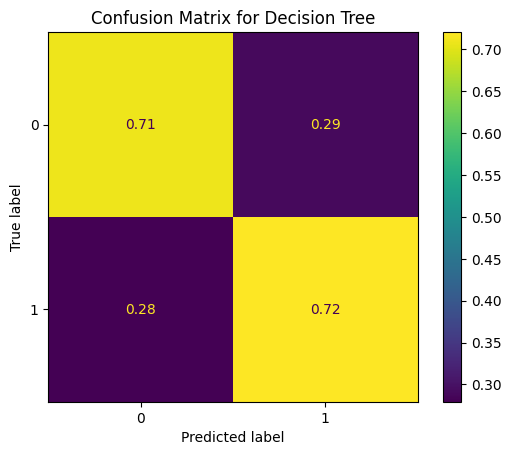

In [35]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=classes)
disp.plot()
plt.title("Confusion Matrix for Decision Tree");

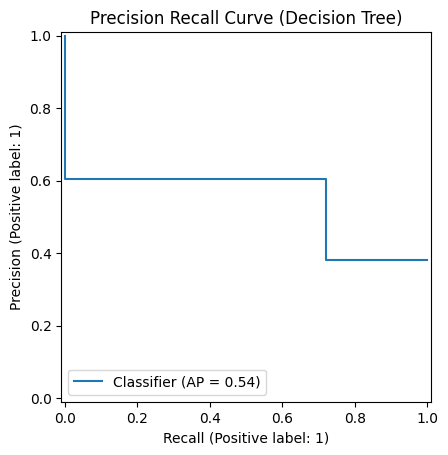

In [36]:
# Plot Precision/Recall curve
PrecisionRecallDisplay.from_predictions(y_true=y_test, y_pred=tree_pred);
plt.title("Precision Recall Curve (Decision Tree)");

## 4.3 Hyperparameter tuning with Decision Tree

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
# Create a dictionary with all of the hyperparameter values to test
dict_params_tree = {
    "max_depth":[2, 4, 6, 8, 10, 12],
    "min_samples_split":[2, 4, 6, 8],
    "class_weight":[None, "balanced"]
}

In [39]:
# Define the GridSearch method
gridsearch_tree = GridSearchCV(estimator=DecisionTreeClassifier(), # model to use
                               param_grid=dict_params_tree, # grid of hyperparameter to test
                               cv=5, # number of splits for K-Fold cross validation
                               scoring="f1") # which metric to use with gridsearch


In [40]:
# Train the models on the training split
gridsearch_tree.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'class_weight': [None, 'balanced'], 'max_depth': [2, 4, ...], 'min_samples_split': [2, 4, ...]}"
,scoring,'f1'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [41]:
# Get the optimal hyperparameter and the f1 score for these parameters
print("Best params:", gridsearch_tree.best_params_)
print("Best f1 score:", gridsearch_tree.best_score_)

Best params: {'class_weight': 'balanced', 'max_depth': 6, 'min_samples_split': 4}
Best f1 score: 0.7577295157903605


In [42]:
# Get the model/estimator with the optimal hyperparameters
best_model = gridsearch_tree.best_estimator_

# Predict values for X_test using the model
best_model_predict = best_model.predict(X_test)

In [43]:
# Compute the f1 score for best_model_predict
best_model_f1 = f1_score(y_true=y_test, y_pred=best_model_predict)
print("f1 score test:", best_model_f1)

f1 score test: 0.6986301369863014
